In [3]:
#First out imports
#Lets import some stuff!

#Numpy
import numpy as np

#Cartopy for mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


#Matplotlib for plotting
import matplotlib.pyplot as plt

#Siphon for finding data
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

#date tools
from datetime import datetime, timedelta
from netCDF4 import num2date

#os tools
import os

import Nio
import xarray
%matplotlib inline

In [4]:
grib_file_test_name = '/data/concord_hrrr/hrrr.t17z.wrfsfcf09.grib2'

In [5]:
grb_x = xarray.open_dataset(grib_file_test_name, engine='pynio')

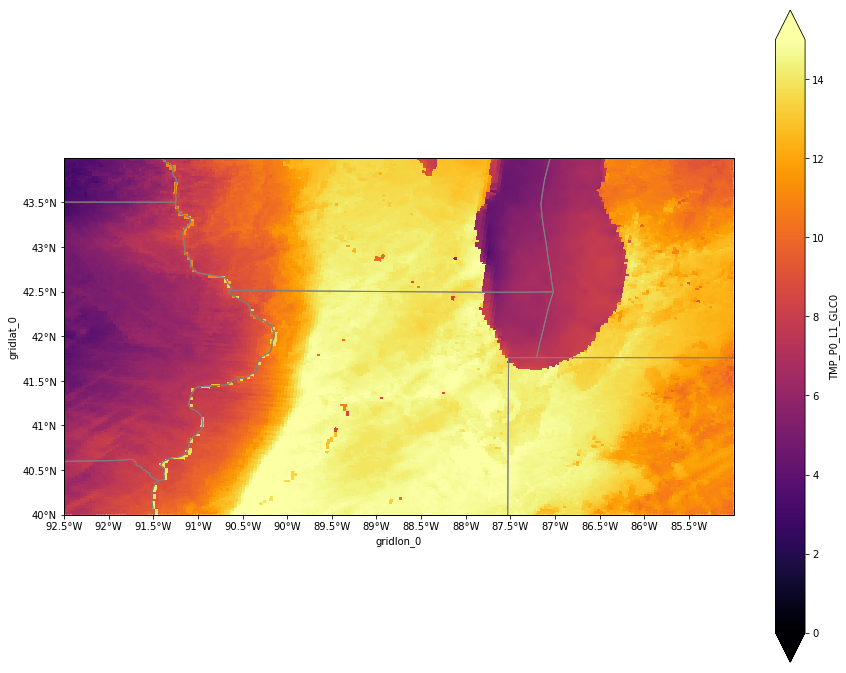

In [6]:
tk = .5
bb={'west':-92.5, 'east':-85.0,'north':44, 'south':40.0}

north = bb['north']
south = bb['south']
west = bb['west']
east = bb['east']
bbox = [west, east, south,north]

fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks(np.arange(west, east, tk), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(south, north, tk), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent(bbox)
#ax.add_feature(cfeature.LAKES, edgecolor='k')
ax.add_feature(cfeature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='10m', facecolor='none',
                             name='admin_1_states_provinces_shp')
_ = ax.add_feature(states, edgecolor='gray')

T_c = grb_x.TMP_P0_L1_GLC0 - 273.5

T_c.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                    x='gridlon_0', y='gridlat_0', vmin = 0, vmax = 15,
                                   cmap = 'inferno')
plt.savefig('../images/hrrtest.png')

In [ ]:
grb_file_list = os.

In [ ]:
cfeature.LAKES?